<a href="https://colab.research.google.com/github/italomarcelogit/python.free/blob/master/COLAB/TENSORFLOW/Classificacao/Beginner_Classificacao_de_Imagens_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Treine sua primeira rede neural: classificação básica**

In [ ]:
# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras

# Librariesauxiliares
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


In [ ]:
# Importe a base de dados Fashion MNIST
# https://www.tensorflow.org/tutorials/keras/classification?hl=pt-br#importe_a_base_de_dados_fashion_mnist
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

# **labels**

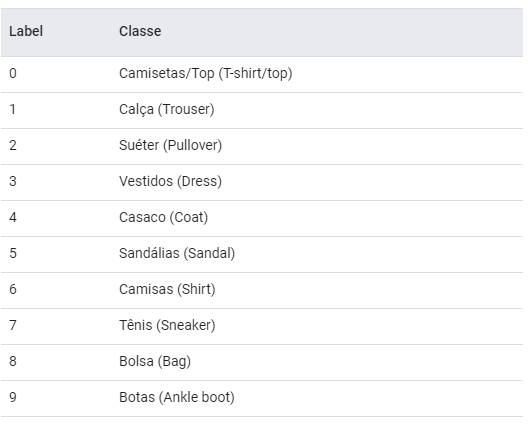

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
import pandas as pd
pd.value_counts(train_labels)

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
dtype: int64

In [ ]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

In [ ]:
pd.value_counts(test_labels)

7    1000
6    1000
5    1000
4    1000
3    1000
2    1000
9    1000
1    1000
8    1000
0    1000
dtype: int64

# **Pre Processamento dos dados**

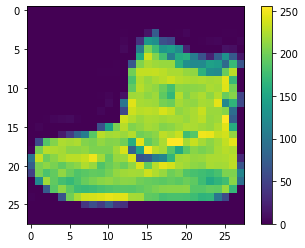

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

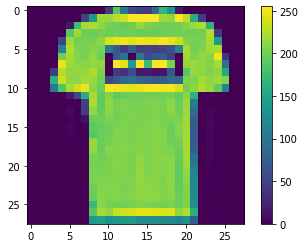

In [ ]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# Escalaremos esses valores no intervalo de 0 e 1 antes antes de alimentar o modelo da rede neural. 
# Para fazer isso, dividimos os valores por 255. 
# É importante que o conjunto de treinamento e o conjunto de teste podem ser 
# pré-processados do mesmo modo:

train_images = train_images / 255.0
test_images = test_images / 255.0

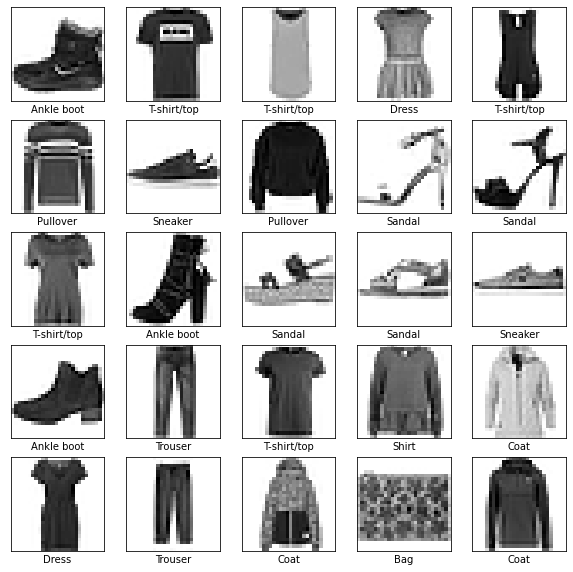

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# **Construindo o modelo**

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5043 - accuracy: 0.8222
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3755 - accuracy: 0.8644
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3375 - accuracy: 0.8754
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3132 - accuracy: 0.8848
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2961 - accuracy: 0.8906


In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3531 - accuracy: 0.8727

Test accuracy: 0.8726999759674072


# **Predições**

In [ ]:
predictions = model.predict(test_images)

In [ ]:
posArray = 0
predictions[posArray]

array([3.5324538e-05, 4.3146795e-07, 2.5768738e-06, 3.9695541e-07,
       2.9790574e-06, 1.7639890e-02, 6.8357367e-05, 1.3141841e-01,
       1.4931832e-04, 8.5068238e-01], dtype=float32)

In [ ]:
np.argmax(predictions[posArray])

9

In [ ]:
test_labels[posArray]

9

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

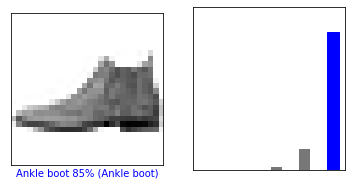

In [ ]:
i = posArray
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

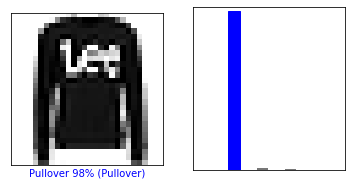

In [ ]:
i = posArray + 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

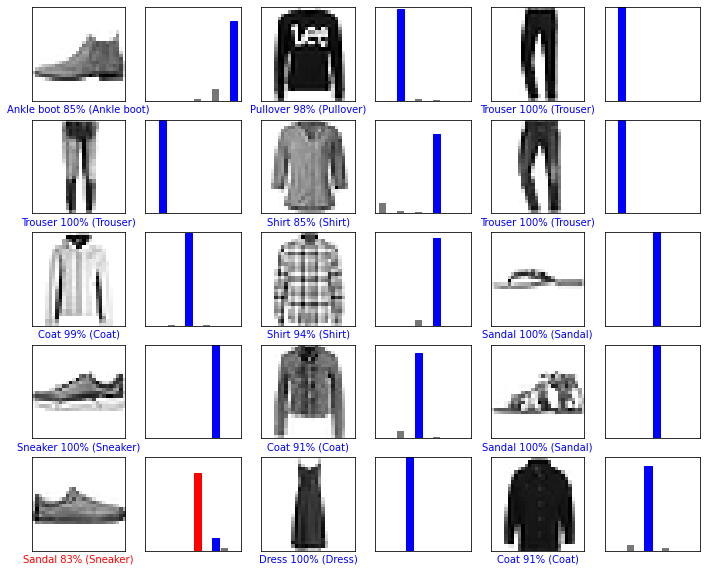

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [ ]:
img = test_images[0]
img.shape

(28, 28)

In [ ]:
img = (np.expand_dims(img,0))
img.shape

(1, 28, 28)

In [ ]:
predictions_single = model.predict(img)
predictions_single

array([[3.5324472e-05, 4.3146756e-07, 2.5768663e-06, 3.9695468e-07,
        2.9790574e-06, 1.7639890e-02, 6.8357243e-05, 1.3141842e-01,
        1.4931847e-04, 8.5068238e-01]], dtype=float32)

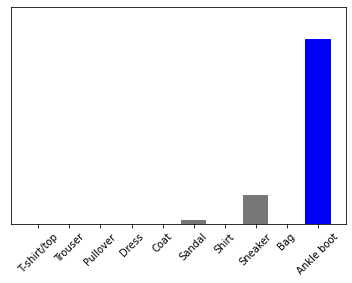

In [ ]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [ ]:
np.argmax(predictions_single[0])

9